In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
from data_ingestion import fetch_data_sqlalchemy

# Set your database credentials
host = 'localhost'
port = 5432
database = 'postgres'
user = 'postgres'
password = 'Nihaar6'
table_name = 'employee_salaries'

# Fetch the data
df = fetch_data_sqlalchemy(host, port, database, user, password, table_name)
df.head()


,job_title,experience_level,employment_type,company_size,company_location,remote_ratio,salary_currency,years_experience,base_salary,bonus,stock_options,total_salary,salary_in_usd,currency,conversion_rate,adjusted_total_usd
0,Data Analyst,Mid,Contract,Medium,Germany,0,INR,13.0,68407.45175,1100.0,19325.0,88832.45175,1065.989421,USD,1.000,88832.451750
1,DevOps Engineer,Mid,Contract,Small,India,100,GBP,9.0,64193.11777,2194.0,19164.0,85551.11777,111216.453100,EUR,1.100,94106.229550
2,Research Scientist,Lead,None,Medium,Germany,0,EUR,19.0,136071.84290,3206.0,12735.0,152012.84290,167214.127200,EUR,1.100,167214.127200
3,Software Engr,Lead,Full-time,Large,India,50,INR,7.0,141850.90530,9594.0,11158.0,162602.90530,19512.348640,USD,1.000,162602.905300
4,Software Engr,Lead,Intern,Large,Germany,100,INR,10.0,121841.16320,6796.0,806.0,129443.16320,1553.317959,INR,0.012,1553.317959


In [3]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


Shape: (100000, 16)
Columns: ['job_title', 'experience_level', 'employment_type', 'company_size', 'company_location', 'remote_ratio', 'salary_currency', 'years_experience', 'base_salary', 'bonus', 'stock_options', 'total_salary', 'salary_in_usd', 'currency', 'conversion_rate', 'adjusted_total_usd']


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   job_title           100000 non-null  object 
 1   experience_level    80000 non-null   object 
 2   employment_type     76016 non-null   object 
 3   company_size        100000 non-null  object 
 4   company_location    100000 non-null  object 
 5   remote_ratio        100000 non-null  int64  
 6   salary_currency     100000 non-null  object 
 7   years_experience    100000 non-null  float64
 8   base_salary         100000 non-null  float64
 9   bonus               100000 non-null  float64
 10  stock_options       100000 non-null  float64
 11  total_salary        100000 non-null  float64
 12  salary_in_usd       100000 non-null  float64
 13  currency            100000 non-null  object 
 14  conversion_rate     100000 non-null  float64
 15  adjusted_total_usd  100000 non-null

In [5]:
df.describe(include='all')


,job_title,experience_level,employment_type,company_size,company_location,remote_ratio,salary_currency,years_experience,base_salary,bonus,stock_options,total_salary,salary_in_usd,currency,conversion_rate,adjusted_total_usd
count,100000,80000,76016,100000,100000,100000.000000,100000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,100000,100000.000000,1.000000e+05
unique,12,4,4,3,6,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
top,Data Analyst,Mid,Part-time,Small,UK,NaN,GBP,NaN,NaN,NaN,NaN,NaN,NaN,GBP,NaN,NaN
freq,16857,20079,19146,33538,17087,NaN,20197,NaN,NaN,NaN,NaN,NaN,NaN,20202,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,49.900000,NaN,10.010730,2.739155e+05,5000.533550,15014.530770,105189.402427,1.033400e+05,NaN,0.833410,2.451668e+05
std,NaN,NaN,NaN,NaN,NaN,40.727222,NaN,6.058082,6.098245e+05,2891.501293,8664.142702,36335.187042,1.461287e+05,NaN,0.446652,5.918202e+05
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,-3.443372e+02,0.000000,0.000000,13732.470750,2.210069e+02,NaN,0.012000,1.647896e+02
25%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,5.000000,5.913957e+04,2508.000000,7463.750000,74890.960610,4.833807e+04,NaN,0.750000,4.949571e+04
50%,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,10.000000,9.292292e+04,5004.000000,14995.000000,105372.474700,9.129188e+04,NaN,1.000000,9.518815e+04
75%,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,15.000000,1.260539e+05,7504.250000,22530.000000,135233.162425,1.333567e+05,NaN,1.100000,1.430316e+05


In [6]:
# title Mapping for the feature Job_title
title_mapping = {
    # Software Engineer variants
    'SoftwareEngineer': 'Software Engineer',
    'Software Engr': 'Software Engineer',
    'Softwre Engineer': 'Software Engineer',
    'Sofware Engneer': 'Software Engineer',

    # Data Scientist variants
    'Data scientist': 'Data Scientist',
    'Dt Scientist': 'Data Scientist',
    'Data Scienist': 'Data Scientist',
    'Data Scntist': 'Data Scientist',

    # Machine Learning Engineer variants
    'Mlenginer': 'Machine Learning Engineer',
    'MachineLearningEngr': 'Machine Learning Engineer',
    'Machine Learning Engr': 'Machine Learning Engineer',
    'ML Enginer': 'Machine Learning Engineer',
    'ML Engr': 'Machine Learning Engineer'
}

df['job_title'] = df['job_title'].replace(title_mapping)

In [7]:
df['job_title'].nunique()

6

In [8]:
df['job_title'].unique()

array(['Data Analyst', 'DevOps Engineer', 'Research Scientist',
       'Software Engineer', 'Data Scientist', 'Machine Learning Engineer'],
      dtype=object)

In [10]:
df['experience_level'].unique()

array(['Mid', 'Lead', None, 'Senior', 'Junior'], dtype=object)

In [11]:
df['employment_type'].unique()

array(['Contract', None, 'Full-time', 'Intern', 'Part-time'], dtype=object)

In [12]:
df['company_size'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [13]:
df['company_location'].unique()

array(['Germany', 'India', 'UK', 'Canada', 'USA', 'Remote'], dtype=object)

In [14]:
df.isnull().sum()


job_title                 0
experience_level      20000
employment_type       23984
company_size              0
company_location          0
remote_ratio              0
salary_currency           0
years_experience          0
base_salary               0
bonus                     0
stock_options             0
total_salary              0
salary_in_usd             0
currency                  0
conversion_rate           0
adjusted_total_usd        0
dtype: int64

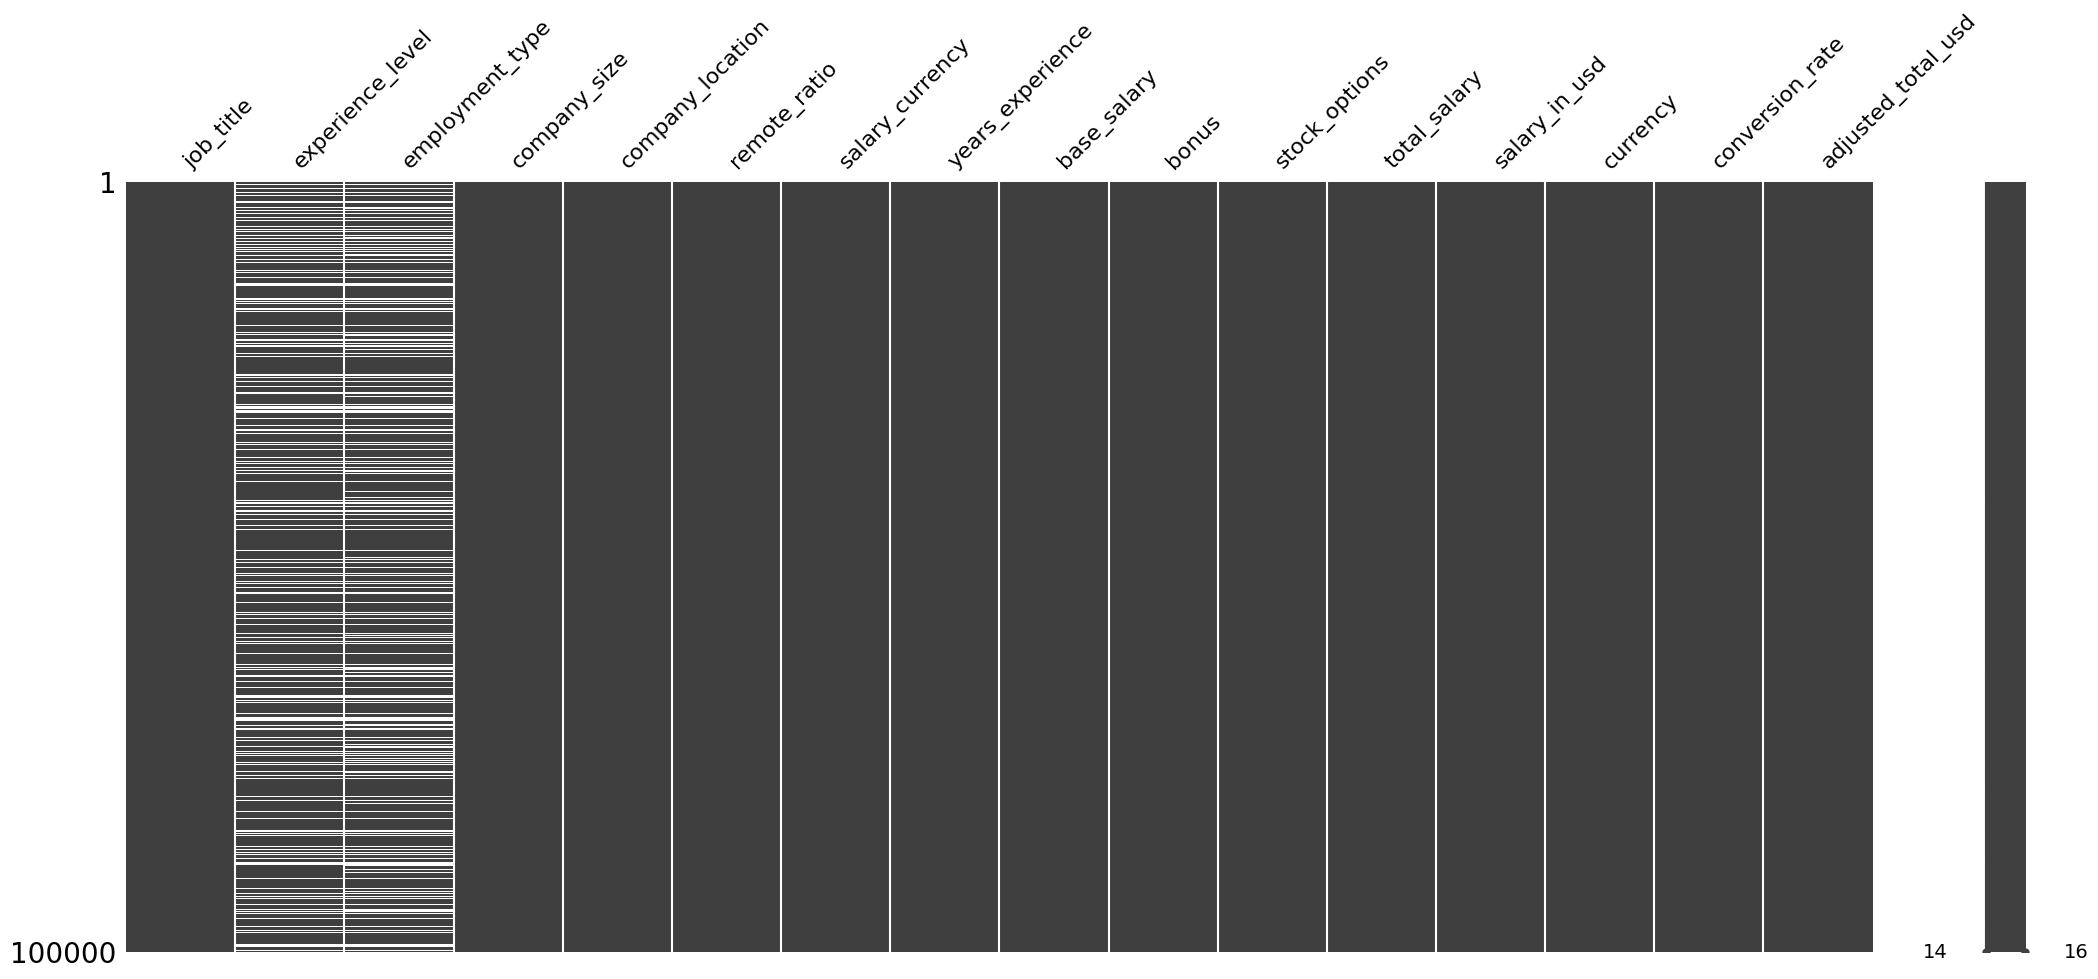

In [18]:
# visualizing missing values
try:

    msno.matrix(df)
    plt.show()
except ImportError:
    print("Install 'missingno' for missing value visualization.")

In [19]:
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 14876


In [20]:
# Calculate skewness for all numeric columns
skewness = df.skew(numeric_only=True)
print(skewness)


remote_ratio          0.003665
years_experience     -0.007286
base_salary           3.256532
bonus                -0.000681
stock_options        -0.005517
total_salary         -0.006914
salary_in_usd         7.403802
conversion_rate      -0.958412
adjusted_total_usd    3.914254
dtype: float64


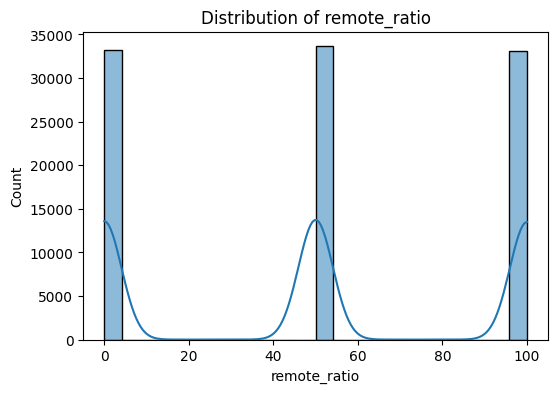

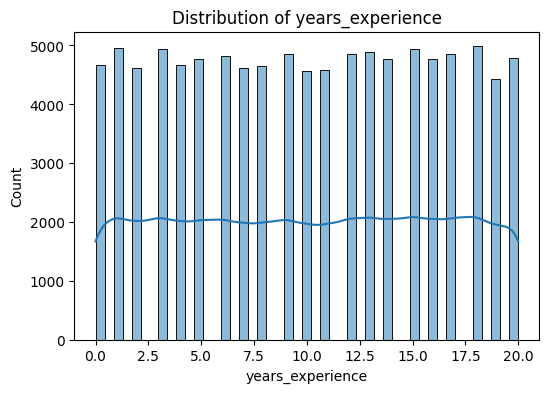

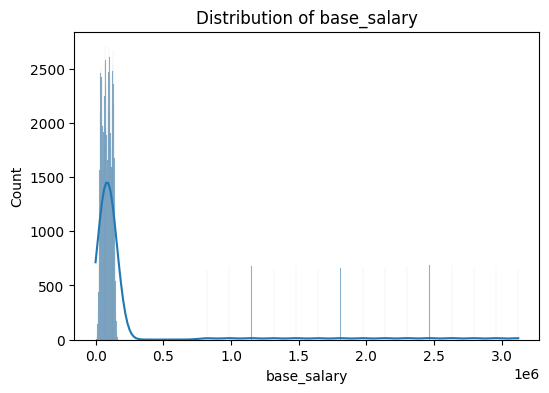

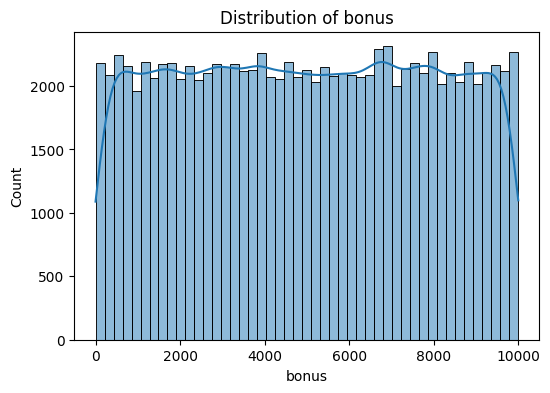

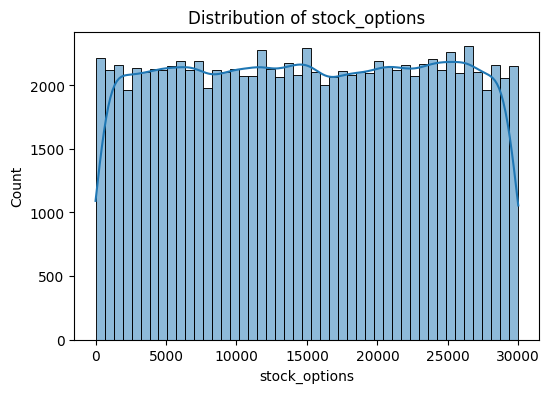

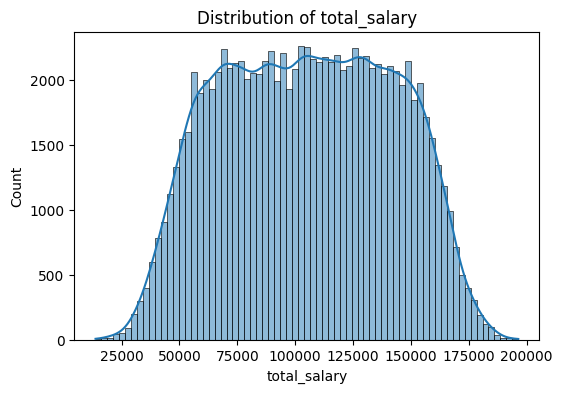

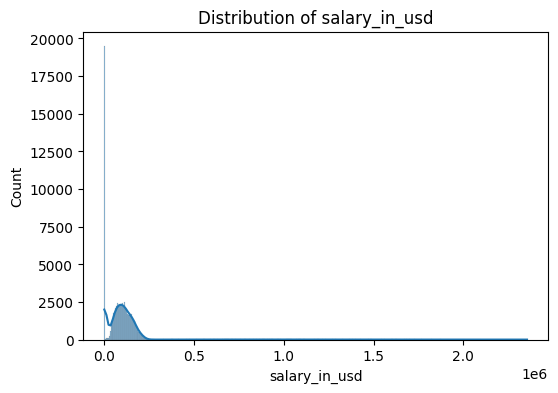

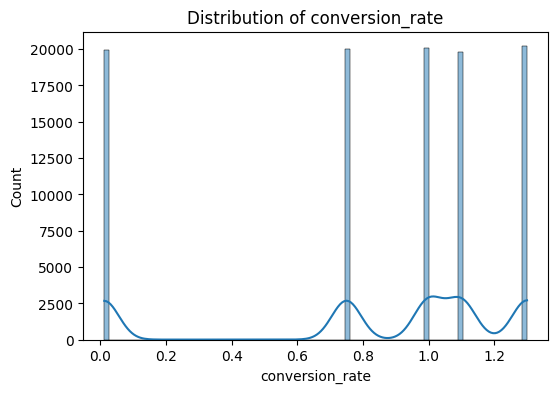

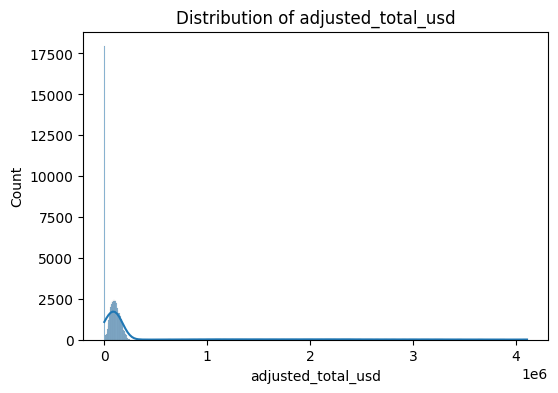

In [34]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Plot distributions
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [21]:
# Univarite Analysis

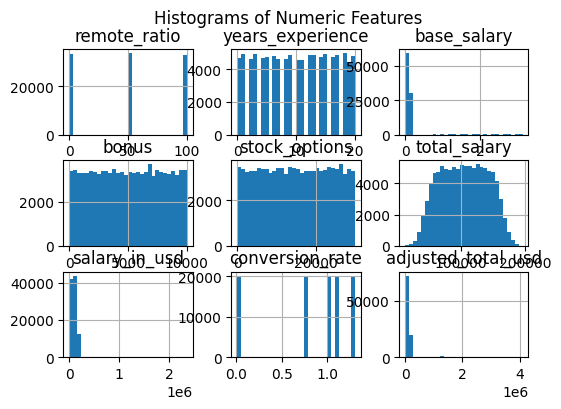

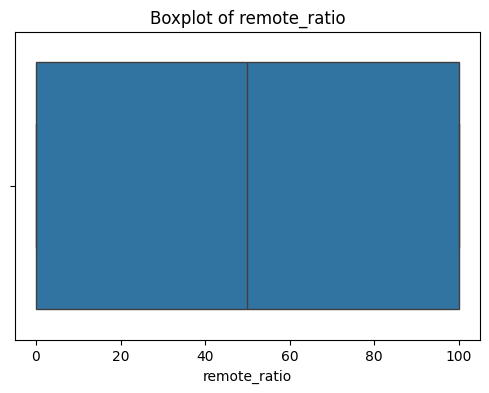

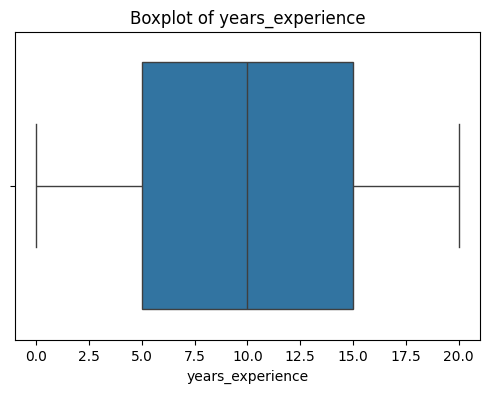

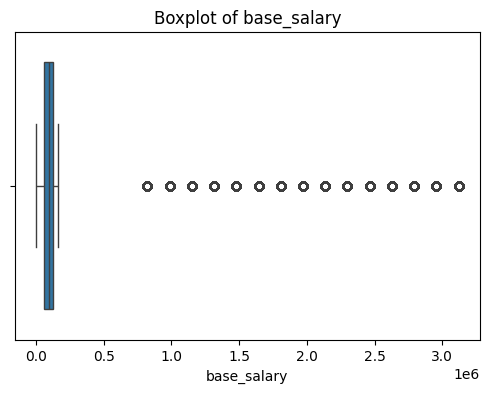

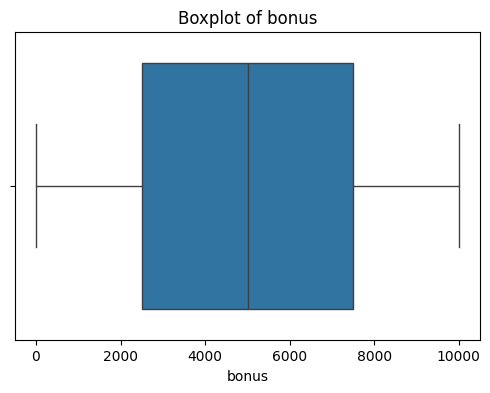

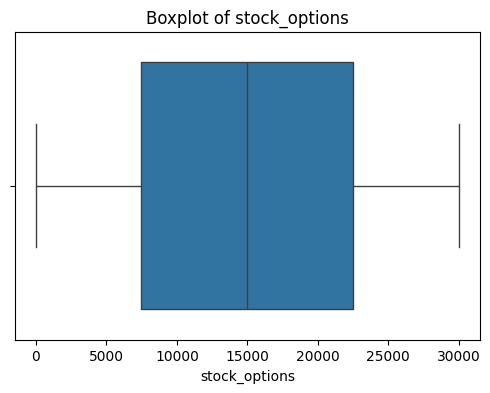

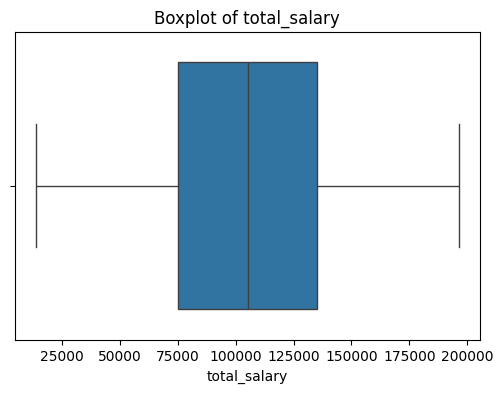

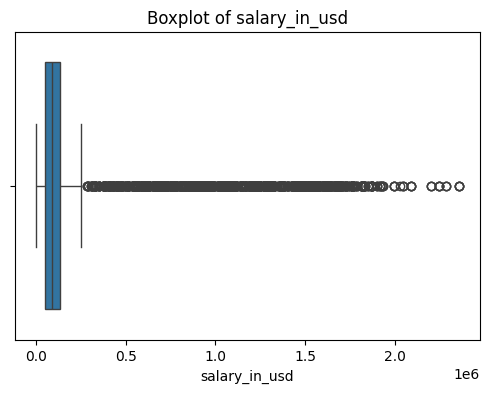

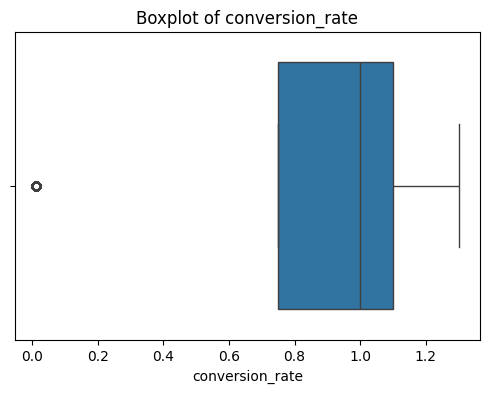

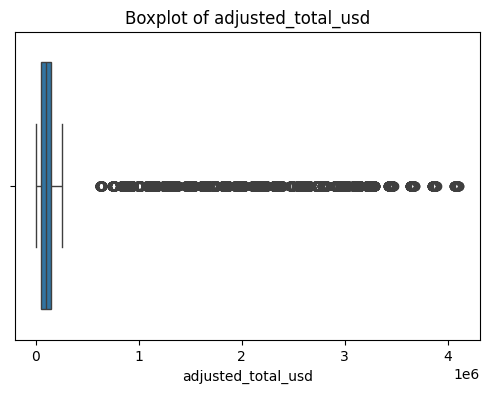

In [35]:
# Numerical Features
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(bins=30, figsize=(6,4))
plt.suptitle("Histograms of Numeric Features")
plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


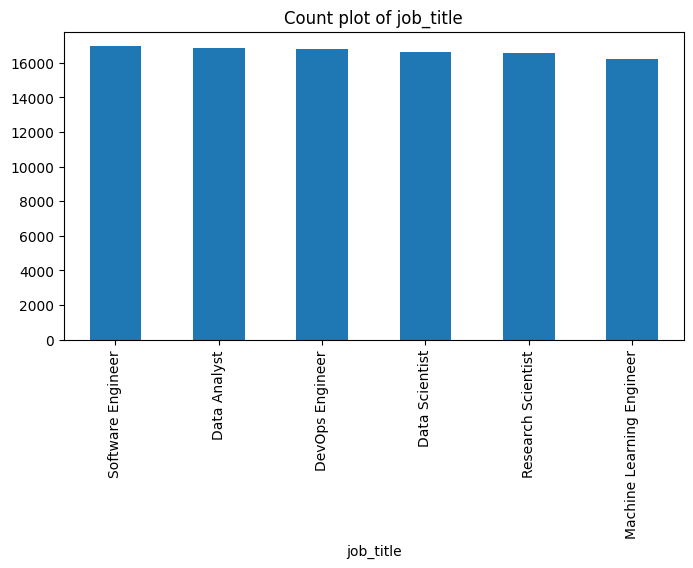

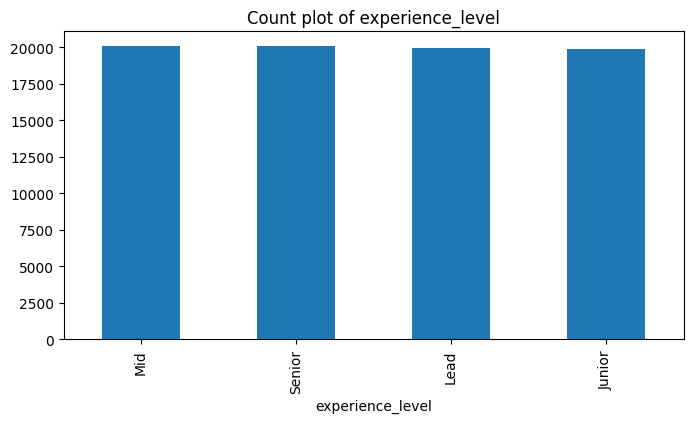

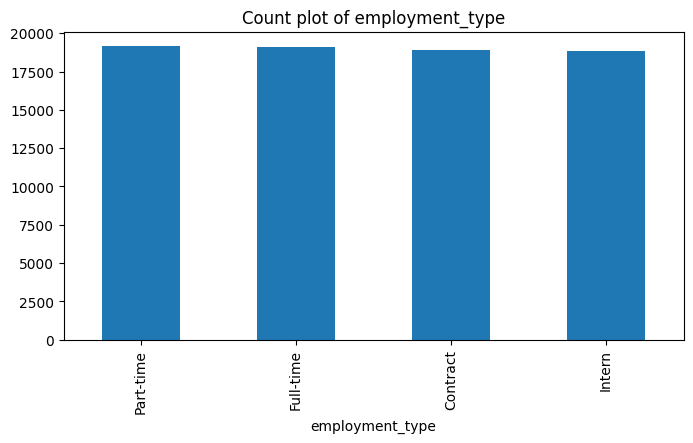

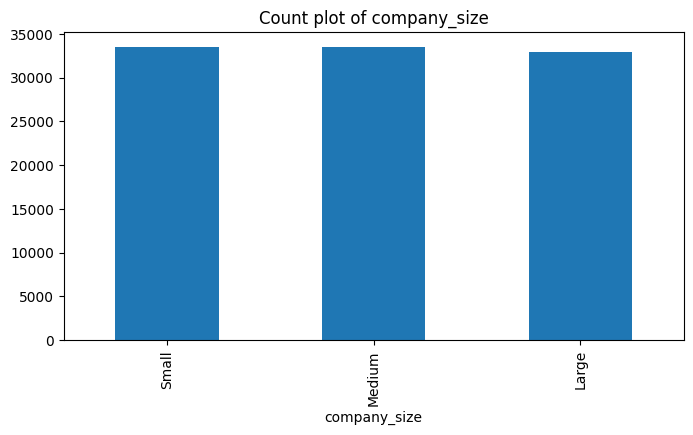

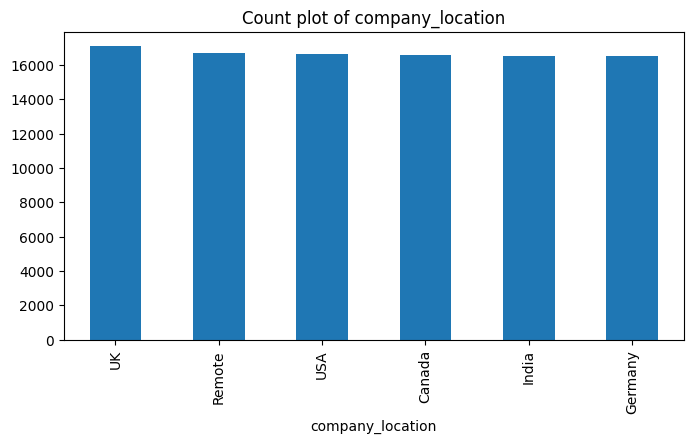

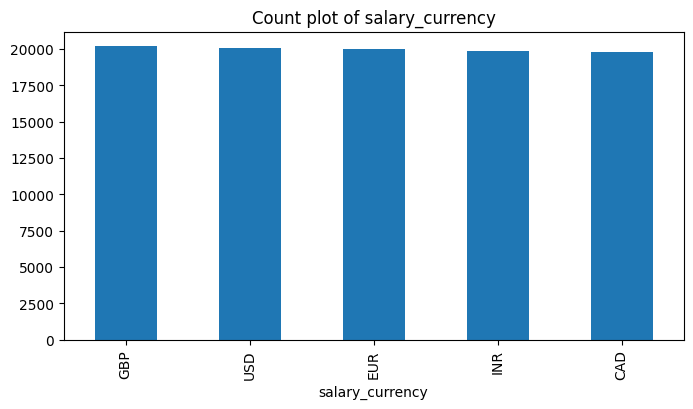

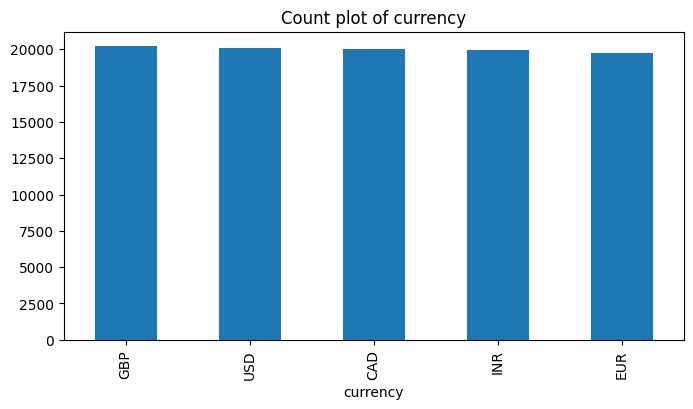

In [28]:
# Categorical Features
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Count plot of {col}')
    plt.show()


Bivariate Analysis


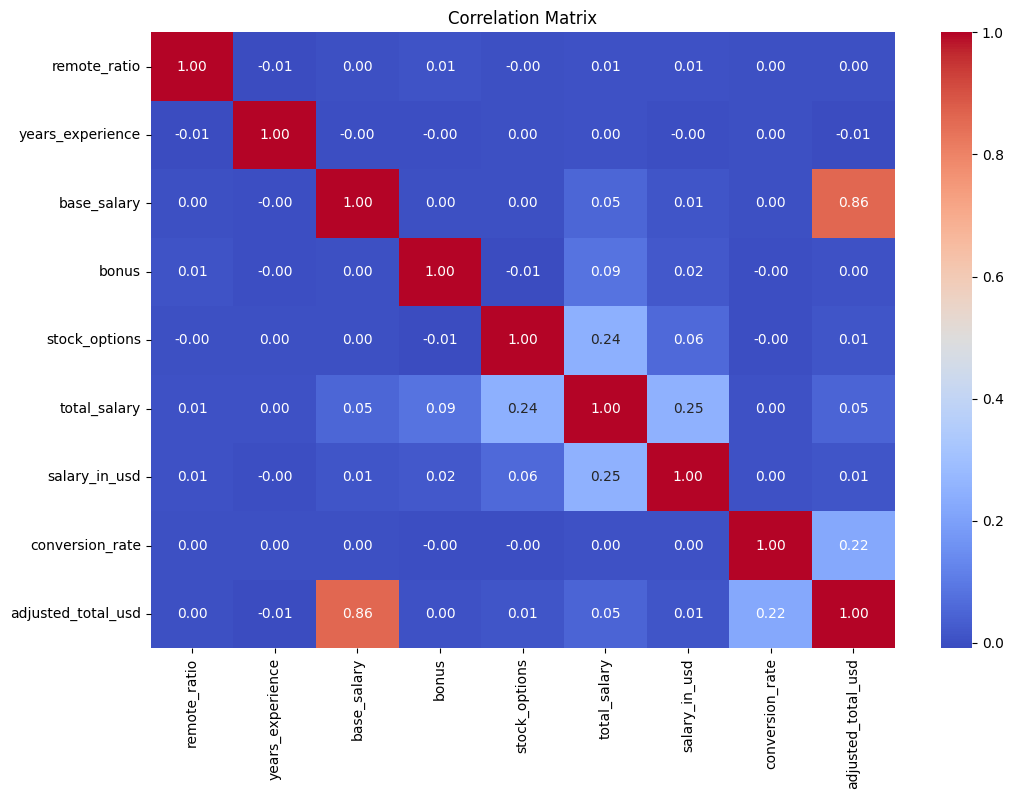

In [29]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


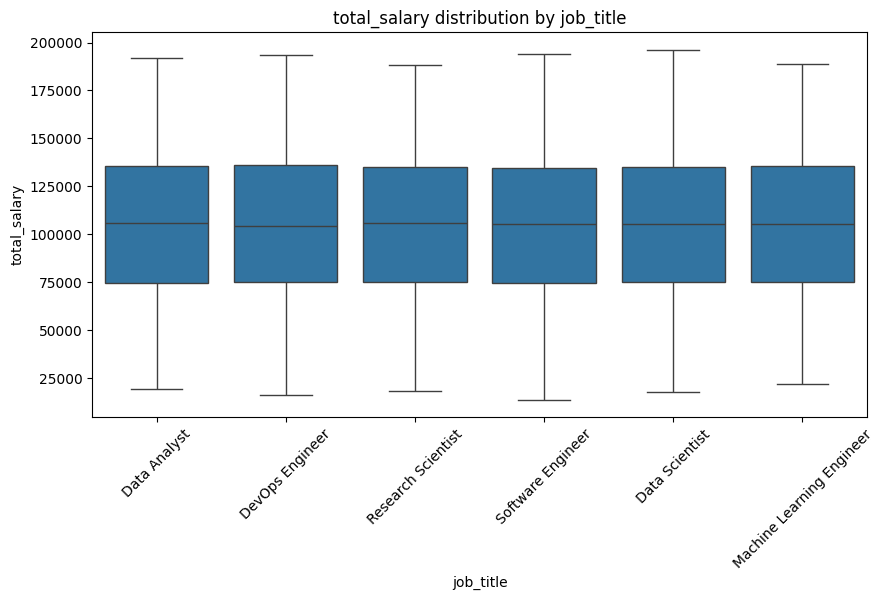

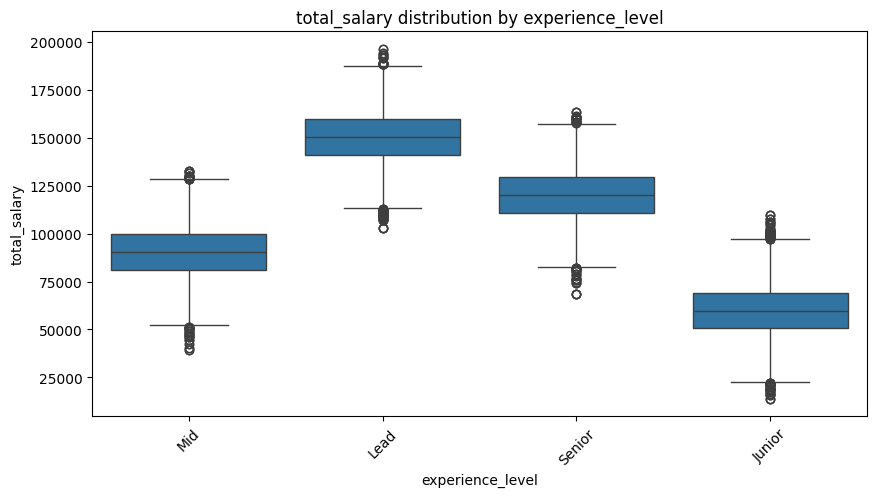

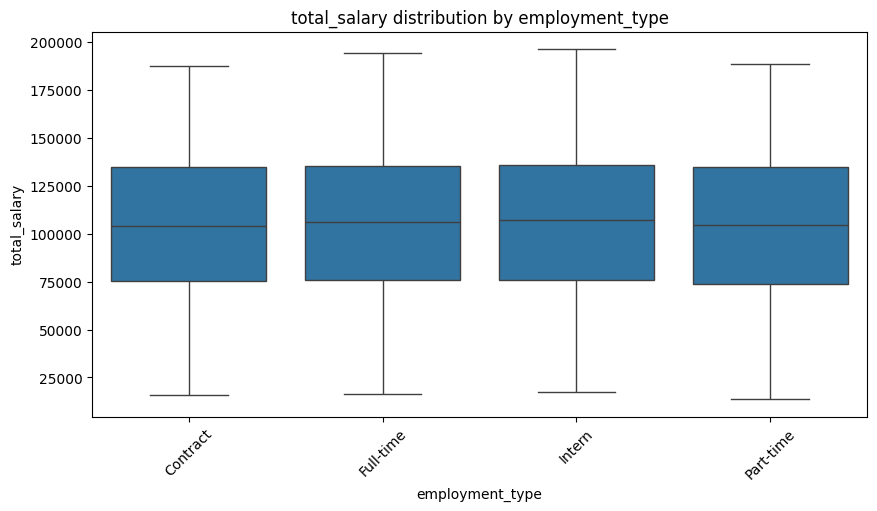

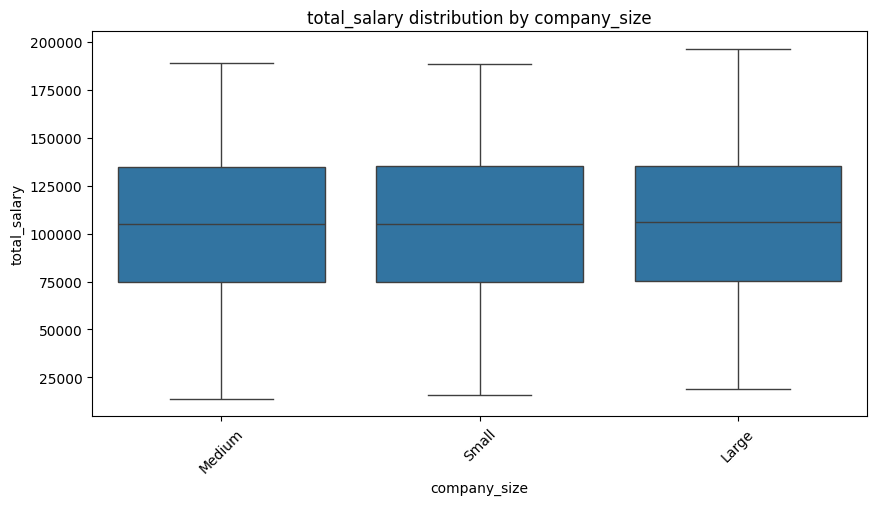

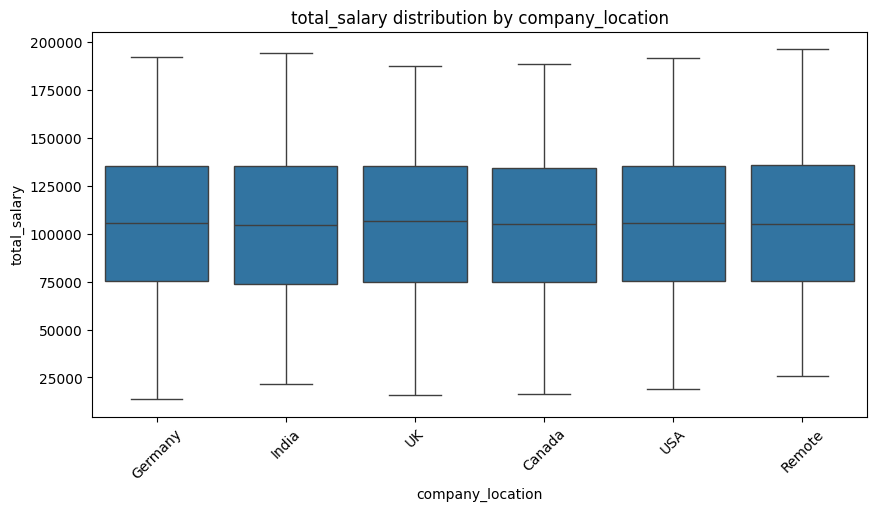

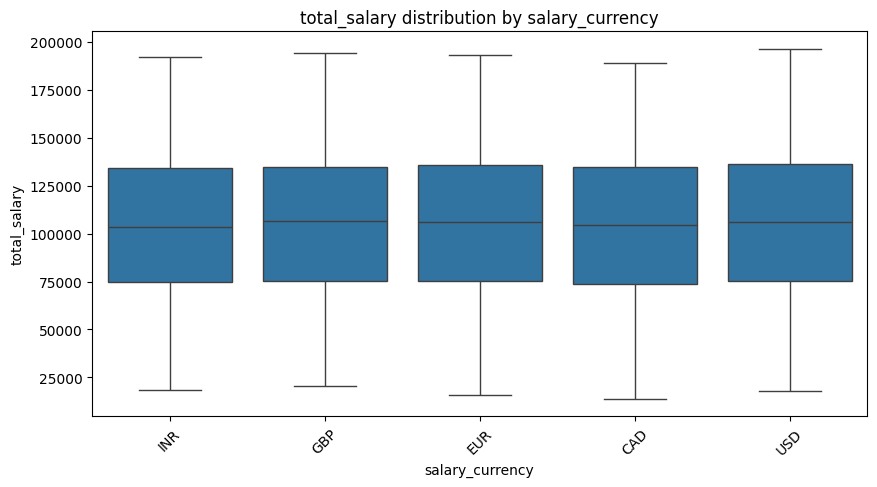

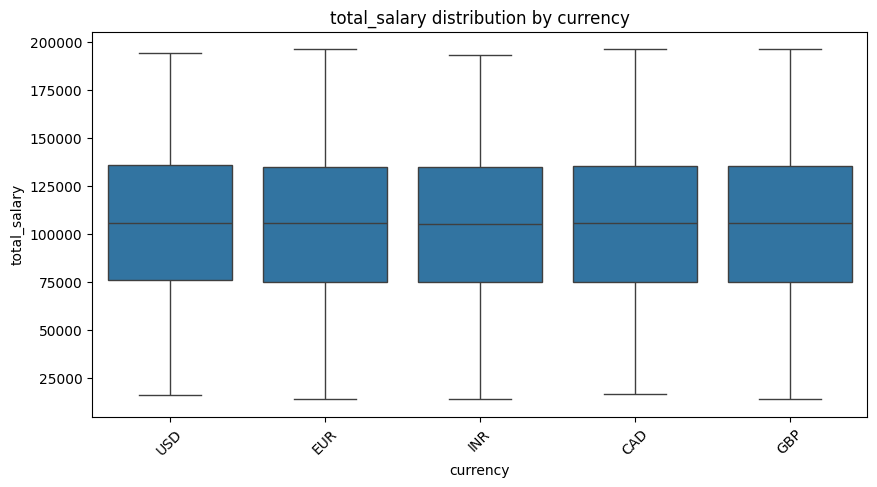

In [31]:
#Boxplots of Target by Categorical Features
target = 'total_salary'  # Change if your target is different
for col in categorical_cols:
    if col == target:
        continue
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y=target, data=df)
    plt.title(f'{target} distribution by {col}')
    plt.xticks(rotation=45)
    plt.show()


In [32]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Outliers in {col}: {len(outliers)}")

for col in numeric_cols:
    detect_outliers_iqr(df, col)


Outliers in remote_ratio: 0
Outliers in years_experience: 0
Outliers in base_salary: 10000
Outliers in bonus: 0
Outliers in stock_options: 0
Outliers in total_salary: 0
Outliers in salary_in_usd: 1580
Outliers in conversion_rate: 19934
Outliers in adjusted_total_usd: 8004


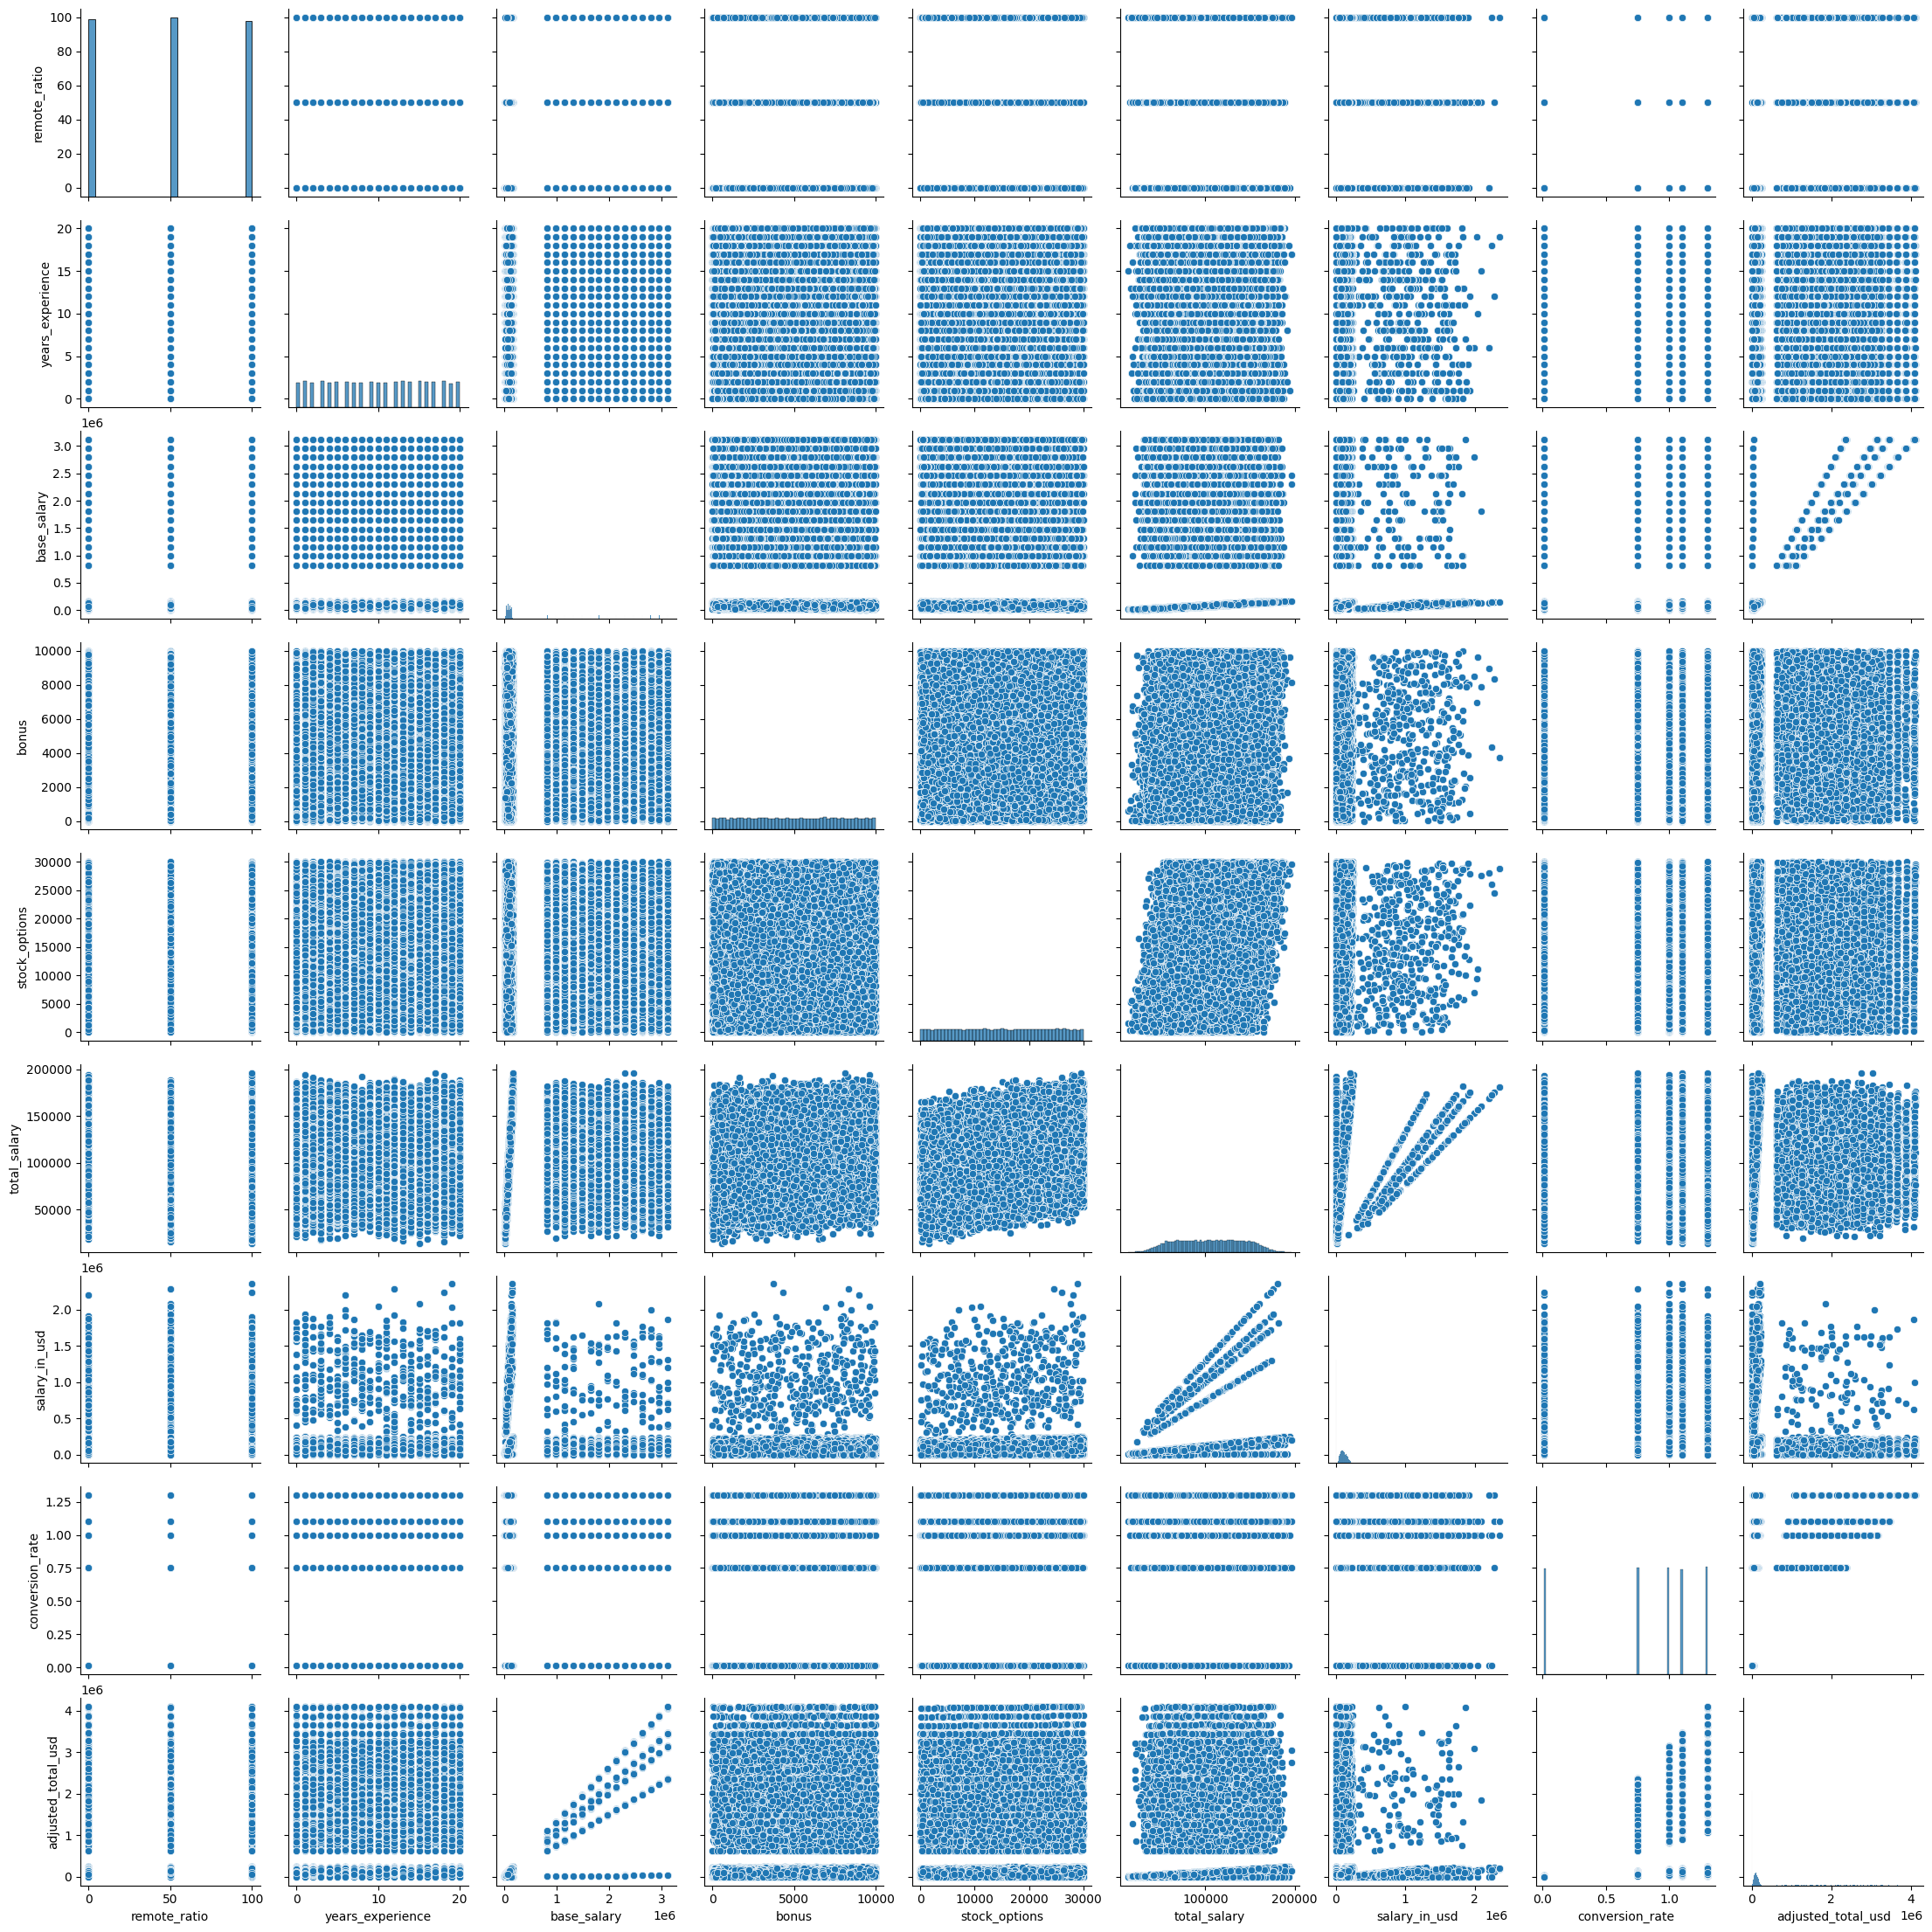

In [33]:
sns.pairplot(df[numeric_cols])
plt.show()
